<a href="https://colab.research.google.com/github/shankardatta2/Projects/blob/main/Copy_of_MY_Copy_of_Team_2_Milestone1PartA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Milestone 1 Part A 
#### *(last edited: 4:30 PM, 10/31/2022)*

---

The main goal of this milestone is to perform a low level summarization on the dataset assigned to your group.

The final outcome of this project is to create a topic based summary of a given document

**Please follow the instruction to work out this milestone. DO NOT use any ready to use algorithms or libraries for this milestone** 

**What's in the dataset and which one to use:**  
a)   
Team #1 please use
[BBC News Summary/News Article/tech](https://drive.google.com/drive/folders/1wyTM67xGJwYlmxG33sbgQevUrSM4gZJ5?usp=share_link)

Team #2 please use
[BBC News Summary/News Article/sport](https://drive.google.com/drive/folders/1Ad8ZuvmVwccPLpuHGQ35TvlPDowf3knb?usp=share_link) 


Team #3 please use
[BBC News Summary/News Article/politics](https://drive.google.com/drive/folders/1mzVdLFmImv86M6tFa03DxrEIelqKIQQU?usp=share_link) 


Team #4 please use
[BBC News Summary/News Article/entertainment](https://drive.google.com/drive/folders/1VJumzOPuIASdNDmbjqoylfNzvVXSAOIB?usp=share_link) 

Team #5 please use
[BBC News Summary/News Article/business](https://drive.google.com/drive/folders/11zVw9d1ewLamBlgPpolf6FBu5onaoAny?usp=share_link)  


b) Each dataset has around four to five hundred  news articles of BBC from 2004 to 2005. The first clause of the text of articles is the respective title.



c) There may be unwanted words or characters in the datasets.

d) Try to retain the original information provided in the dataset. Try not to change or delete any part of the given dataset unless it is absolutely necessary.

e) You must use this template to add your code and comments when you submit your team project results in the form of another Colab.

f) Please add me (chris.tseng@sjsu.edu) and the TA (pranavabhijit.ghaskadbi@sjsu.edu) to your discord group and email the TA the following:   
f.1 your section (1 or 2)   
f.2 your team #(1,.., 5)   
f.3 the link to your discord discussion group


## Main tasks


--- 
**Remember to use Markdown cells to describe your work**   
*Do not simply use #s in your code cells for commemnt description*

**Load packages:**

In [ ]:
# !pip install -U textblob
# !python -m textblob.download_corpora lite

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob.tokenizers import WordTokenizer
import nltk
# from nltk.tag import pos_tag
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Get a copy of the data to your own Google drive
Step 1. Use [this chrome app](https://script.google.com/macros/s/AKfycbxbGNGajrxv-HbX2sVY2OTu7yj9VvxlOMOeQblZFuq7rYm7uyo/exec) to copy the[ BBC News Summary](https://drive.google.com/drive/folders/1ZryN8xuRFi0LNYPS1zfZ43RsuW0L6lij?usp=share_link) folder that I shared with you to your own drive.  
Step 2. Put the copied folder in the exact path under your Google drive, i.e., ``` /content/drive/MyDrive/sharedata/BBC News Summary ```, so you collaborate with your team members and get graded subsequently.   

Step 3. <font color =red>0 project score </font> will be given for <font color =red>not following this folder configuration</font> in step 2.
(Our grader is not reponsible to figure out your own perferred Google folder configuration)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#1 Mount the Google drive in preparation for data access
!pip install -U path.py
import numpy as np
import pandas as pd
import os
from path import Path
# from google.colab import drive
# drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<a id='load_data'></a>

### Load the data

---

Import the assinged data into a pandas DataFrame.
(Extend the code below to access other files under your assigned folder)

In [ ]:
corpus = []
corpus_dir = Path('/content/drive/MyDrive/sharedata/BBC News Summary/News Articles/sport')

for i in range(1, 511):
  file_number = '%0*d' % (3, i)
  with open(f'{corpus_dir}/{file_number}.txt', mode='rt', encoding='utf-8') as fp:
    try:
      lines = fp.read().splitlines()
      corpus.append([i for i in lines if i])
    except:
      corpus.append([])
      print('There is an error with the following file:\n', f'{file_number}.txt')

There is an error with the following file:
 199.txt


### Show what the first txt file looks like

In [ ]:
corpus[0]

['Claxton hunting first major medal',
 "British hurdler Sarah Claxton is confident she can win her first major medal at next month's European Indoor Championships in Madrid.",
 'The 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. "I am quite confident," said Claxton. "But I take each race as it comes. "As long as I keep up my training but not do too much I think there is a chance of a medal." Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week\'s Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.',
 'For the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previ

### How many txt files are under your assigned folder?

In [ ]:
print('There are {} text files under my assigned folder'.format(len(corpus)))

There are 510 text files under my assigned folder


<a name='tokenize'></a>

### 1. Tokenize all sentences in the give survey dataset with TFIDF.

- Start with default parameters.
- How many rows and columns are there in the resultant vectorized dataframe.


In [ ]:
documents = []
for x in corpus:
  common = ''
  for i, sentence in enumerate(x):
    if i == 0: 
      common += sentence + '.\n'
    else: common += sentence + '\n'
  documents.append(common)

In [ ]:
print(documents[0])

Claxton hunting first major medal.
British hurdler Sarah Claxton is confident she can win her first major medal at next month's European Indoor Championships in Madrid.
The 25-year-old has already smashed the British record over 60m hurdles twice this season, setting a new mark of 7.96 seconds to win the AAAs title. "I am quite confident," said Claxton. "But I take each race as it comes. "As long as I keep up my training but not do too much I think there is a chance of a medal." Claxton has won the national 60m hurdles title for the past three years but has struggled to translate her domestic success to the international stage. Now, the Scotland-born athlete owns the equal fifth-fastest time in the world this year. And at last week's Birmingham Grand Prix, Claxton left European medal favourite Russian Irina Shevchenko trailing in sixth spot.
For the first time, Claxton has only been preparing for a campaign over the hurdles - which could explain her leap in form. In previous seasons, t

In [ ]:
tfidfVect = TfidfVectorizer()

In [ ]:
df_corpus = pd.DataFrame(tfidfVect.fit_transform(documents).toarray(),
                  columns=tfidfVect.get_feature_names())
df_corpus.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,000m,01,02,0227,033,04,04secs,05,...,zinc,zinedine,zoe,zogbia,zola,zone,zornotza,zuluaga,zurich,zvonareva
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.000000,0.066885,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.211252,0.105393,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_corpus.shape

(510, 10556)

In [ ]:
print(f'The number of rows are: {df_corpus.shape[0]}')
print(f'The number of columns are: {df_corpus.shape[1]}')

The number of rows are: 510
The number of columns are: 10556


<a name='stopwords'></a>

### 2. Show the top words

- Visualize them with a bar chart with frequency in y axis and words in the x-axis
- You may selectively choose top words as the stop words for your processing needs

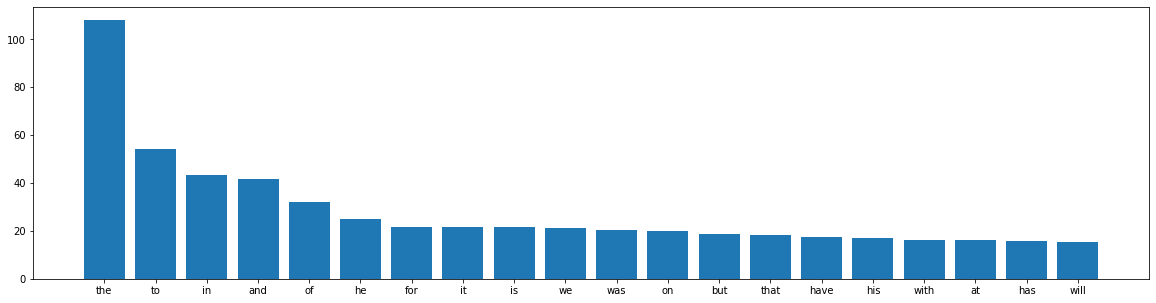

In [ ]:
# get count of top-occurring words
top_words_tf = {}
for i in df_corpus.columns:
    top_words_tf[i] =  df_corpus[i].sum()
    
# top_words to dataframe sorted by highest occurance
most_freq_tf = pd.DataFrame(sorted(top_words_tf.items(), key = lambda x: x[1], reverse = True))

plt.figure(figsize = (20, 5))

# visualize top 20 words
plt.bar(most_freq_tf[0][:20], most_freq_tf[1][:20]);

In [ ]:
stop_words = most_freq_tf[0][:20].tolist()

In [ ]:
tfidfVect = TfidfVectorizer(stop_words = stop_words)
tokenized_words = tfidfVect.fit_transform(documents)

In [ ]:
columns = tfidfVect.get_feature_names_out()

In [ ]:
print(f'The number of rows are: {len(tokenized_words.toarray())}')
print(f'The number of columns are: {len(columns)}')

The number of rows are: 510
The number of columns are: 10536


### After preprocessing the text, it is necessary to extract features and calculate the functions of the sentence, the results of which are vectors of several elements for each sentence. The elements of each vector take values in the interval [0, 1]. We consider the following features

## Write a function for each of the features below that would return the feature score for any given sentence

<a name='title'></a>

### 3. Title feature (F1)
It is defined as a ratio of the number of matches of the Title words (Tw) in the current sentence (S) to the number of words (w) of the Title (T)   

<img alt="F1" src="https://drive.google.com/uc?export=view&id=1J1GGrkuGcHhPlGRIo7xmPlwHLe0I2LcV">

In [ ]:
def F1_Scores(sentences):
  count_vect = CountVectorizer()
  matrix_vector = count_vect.fit_transform(sentences).toarray()
  print(matrix_vector)
  number_of_words_in_title = sum(a == 1 for a in matrix_vector[0])
  print(number_of_words_in_title)
  scores = []
  for i in range(len(matrix_vector)):
    score = (sum(a==b and a == 1 for a,b in zip(matrix_vector[0],matrix_vector[i])))/(number_of_words_in_title)
    scores.append(score)
  return scores

In [ ]:
sentences = sent_tokenize(str(documents[0]))
# F1_Scores(documents[0])
sentences
F1_Scores(sentences)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
5


[1.0, 0.8, 0.0, 0.2, 0.0, 0.2, 0.2, 0.0, 0.4, 0.4, 0.0, 0.2]

<a name='sentencelength'></a>

### 4. Sentence Length (F2)
It is defined as a ratio of the number of words (w) in the current sentence (S) to the number of words in the longest sentence (LS) in the text.   

<img alt="F2" src="https://drive.google.com/uc?export=view&id=1b42IWpr5svaCyQl6fdnGNWaLP3Rv4bgK">

In [ ]:
def F2_Scores(sentences):
  words_in_sentence = []
  for i in sentences:
    words_in_sentence.append(len(i.split()))
  
  words_in_long_sent = max(words_in_sentence)

  scores = []
  for i in words_in_sentence:
    s = i / words_in_long_sent
    scores.append(s)
  
  return scores

<a name='position'></a>

### 5. Sentence position (F3)
It is defined as a maximum of the next two relations   

<img alt="F3" src="https://drive.google.com/uc?export=view&id=1WNqhFyRSkFR7RaGqtZaywOmQVBrUJyb0">


In [ ]:
def F3_Scores(document):
  # print(len(document))
  f3_score = []
  n = len(document)
  for i in range(n):
    a = 1/(i+1)
    b = 1/(n-(i+1)+1)
    f3_score.append(max(a,b))

  return f3_score

<a name='tfidf'></a>

### 6. Term Weight (F5)
It is defined as a ratio of the sum of the frequencies of term occurrences (TO) in a sentence (S) to the sum of the frequency of term occurrences in the text.   

<img alt="F5" src="https://drive.google.com/uc?export=view&id=1wS8NV1otHFjgu4NePxkyPwQXFpZ4f93q">


In [ ]:
def F5_Scores(document):
  pass

<a name='propernoun'></a>

### 7. Proper Noun (F6):     
It is defined as a ratio of the number of proper nouns (PN) in a sentence (S) to the length (L) of a sentence

<img alt="F6" src="https://drive.google.com/uc?export=view&id=1MEBknA87K-vPSlu061F-hOz_c9aHrl6W">

In [ ]:
def F6_Scores(document):
  scores = []
  for sentence in document:
    words_in_sentence = sentence.split()
    propernouns = [word for word,pos in nltk.pos_tag(words_in_sentence) if pos == 'NNP']
    scores.append(len(propernouns)/len(words_in_sentence))
  return scores

In [ ]:
sentences = sent_tokenize(str(documents[0]))
# F1_Scores(documents[0])
sentences
F6_Scores(sentences)

['Claxton', 'hunting', 'first', 'major', 'medal.']
['Claxton']
0.2

['British', 'hurdler', 'Sarah', 'Claxton', 'is', 'confident', 'she', 'can', 'win', 'her', 'first', 'major', 'medal', 'at', 'next', "month's", 'European', 'Indoor', 'Championships', 'in', 'Madrid.']
['Sarah', 'Claxton', 'Indoor', 'Championships', 'Madrid.']
0.23809523809523808

['The', '25-year-old', 'has', 'already', 'smashed', 'the', 'British', 'record', 'over', '60m', 'hurdles', 'twice', 'this', 'season,', 'setting', 'a', 'new', 'mark', 'of', '7.96', 'seconds', 'to', 'win', 'the', 'AAAs', 'title.']
['AAAs']
0.038461538461538464

['"I', 'am', 'quite', 'confident,"', 'said', 'Claxton.']
['Claxton.']
0.16666666666666666

['"But', 'I', 'take', 'each', 'race', 'as', 'it', 'comes.']
[]
0.0

['"As', 'long', 'as', 'I', 'keep', 'up', 'my', 'training', 'but', 'not', 'do', 'too', 'much', 'I', 'think', 'there', 'is', 'a', 'chance', 'of', 'a', 'medal."']
[]
0.0

['Claxton', 'has', 'won', 'the', 'national', '60m', 'hurdles', 'titl

[0.2,
 0.23809523809523808,
 0.038461538461538464,
 0.16666666666666666,
 0.0,
 0.0,
 0.04,
 0.07142857142857142,
 0.3157894736842105,
 0.043478260869565216,
 0.09090909090909091,
 0.2]

<a name='numerical'></a>

### 8.Numerical Data (F7)
 It is defined as a ratio of the number of numerical data (ND) in the sentence (S) to the length (L) of the sentence   

 <img alt="F7" src="https://drive.google.com/uc?export=view&id=1tCaSaipvqs3CvpvISyCR5ytNzDCuwJV5">


In [ ]:
def F7_Scores(document):
  sentences = document
  score = []
  for sentence in sentences:
    num_numerical_data = 0;
    count = 0;
    for word in word_tokenize(str(sentence)):
      if not(word.isalpha()):
        
        if('-' in word):
          for charcter in word.split('-'):
            if(charcter.isdigit()):
              num_numerical_data+=1
        else:
          
          word = ''.join(c for c in word if (c.isdigit())).strip()
          if(word.isdigit()):
            if word.isnumeric():
              num_numerical_data+=1
          count+=1
    
    score.append(num_numerical_data/count)

  return score

<a name='combine'></a>

### 9. Combining feature vectors to decide which are representative statements
Propose a formula that combines the F scores for any given sentence.   

Explain why your formula would allow you to identify the most important sentences as a possible summary of the original article.   

Justify your formula with reasons


<a name='validation'></a>

### 10. Validation
With your formula, show a one sentence summary of each of the given article in your assigned data folder.    

Provide an interactive code below for users to enter a random number, say 42, and view the original article (042.txt) and the deduced matching one sentence summary


In [ ]:
def getBestSentenceForSummary(file_number):
  document = documents[file_number - 1]
  print(document)
  sentences = sent_tokenize(str(document))
  f1 = F1_Scores(sentences)
  f2 = F2_Scores(sentences)
  f3 = F3_Scores(sentences)
  f5 = F5_Scores(sentences)
  f6 = F6_Scores(sentences)
  f7 = F7_Scores(sentences)
  weights = [3, 8, 3, 5, 8, 8]
  scores = []
  max_score = 0
  for i, sentence in enumerate(sentences):
    score = weights[0] * f1[i] + weights[1] * f2[i] + weights[2] * f3[i] + weights[3] * f5[i] + weights[4] * f6[i] + weights[5] * f7[i]
    scores.append(score / sum(weights))
    if score > max_score:
      max_score = score
      best_sentence_index = i
  print(sentences[best_sentence_index])
  print(scores[best_sentence_index], sum(scores)/len(scores))
  return scores

In [ ]:
393
326

<a name='experiment'></a>

### 11. Experiment with removing stopwords, lemmatization, and stemming options in vectorizing the given dataset.
- Repeat steps above with one of the three options and see which would be able to return a more representative summary sentence for any given articles in your assigned domain
- Consider using your customized stopwords list to enhance results.
- What combination of these three options give you the best result.
- Explain the why the combination option would yields a representative sentence.
